<a href="https://colab.research.google.com/github/heikkimikkonen/DAO/blob/main/Final_Work_Mikkonen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 26.4 MB/s eta 0:00:00


In [ ]:
from faker import Faker
import pandas as pd
import random
from datetime import datetime

# Initialize Faker
fake = Faker()

# List of car models
car_models = ['Model S', 'Model 3', 'Model X', 'Model Y', 'Cybertruck']

# Create empty list to hold data
data = []

# Function to generate net revenue
def generate_net_revenue():
    if random.random() < 0.05:  # 5% chance of being an outlier
        return random.randint(10000, 50000)
    else:
        return random.randint(100, 10000)

# Generate data
for _ in range(100):
    name = fake.name()
    city = fake.city()
    country = fake.country()
    sex = random.choice(['Male', 'Female'])
    age = random.randint(18, 80)

    num_products = random.randint(1, len(car_models))
    products_reviewed = random.sample(car_models, num_products)

    for product in products_reviewed:
        feedback = fake.text(max_nb_chars=200)
        net_revenue = generate_net_revenue()
        date = fake.date_this_decade(before_today=True, after_today=False)

        data.append({
            'Name': name,
            'City': city,
            'Country': country,
            'Sex': sex,
            'Age': age,
            'Product': product,
            'Feedback': feedback,
            'NetRevenue': net_revenue,
            'Date': date
        })

# Create DataFrame
df = pd.DataFrame(data)

# Save to Excel
df.to_excel('feedback_with_random_products.xlsx', index=False)

print('Data generated and saved to feedback_with_random_products.xlsx')


Data generated and saved to feedback_with_random_products.xlsx


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

df = pd.read_excel('/content/feedback_with_random_products.xlsx')
print(df.head())


              Name            City                        Country   Sex  Age  \
0  Patrick Johnson  Williamchester                        Senegal  Male   52   
1  Patrick Johnson  Williamchester                        Senegal  Male   52   
2   Monica Salinas     Robertsberg  Holy See (Vatican City State)  Male   43   
3   Monica Salinas     Robertsberg  Holy See (Vatican City State)  Male   43   
4    Steven Barnes      Murphystad           United Arab Emirates  Male   19   

      Product                                           Feedback  NetRevenue  \
0     Model Y  Eight whether change detail whom happen. Natio...        9658   
1     Model X  Instead education natural each particularly. P...        3849   
2  Cybertruck  Try economic service while. Production station...        8533   
3     Model S  Dream pass large one avoid offer. Focus boy fr...         876   
4     Model 3  By buy month machine need of. Other rest every...        2358   

        Date  
0 2022-10-05  
1 2020-0

In [ ]:
print(df.describe(include='all'))

                    Name       City Country     Sex         Age  Product  \
count                327        327     327     327  327.000000      327   
unique               100         99      81       2         NaN        5   
top     Jessica Chandler  East Sean  Taiwan  Female         NaN  Model X   
freq                   5          5      10     165         NaN       72   
mean                 NaN        NaN     NaN     NaN   48.522936      NaN   
min                  NaN        NaN     NaN     NaN   18.000000      NaN   
25%                  NaN        NaN     NaN     NaN   31.000000      NaN   
50%                  NaN        NaN     NaN     NaN   48.000000      NaN   
75%                  NaN        NaN     NaN     NaN   66.500000      NaN   
max                  NaN        NaN     NaN     NaN   80.000000      NaN   
std                  NaN        NaN     NaN     NaN   19.369160      NaN   

                                                 Feedback    NetRevenue  \
count       

In [ ]:
import pandas as pd

df = pd.read_excel('/content/Final_work_Mikkonen.xlsx', sheet_name='Raw data')

In [ ]:
!pip install openpyxl


In [ ]:

import pandas as pd

df2 = pd.read_excel('/content/Final_work_Mikkonen.xlsx', sheet_name='Raw data')


descriptive_df = df2.describe(include='all')

with pd.ExcelWriter('Final_work_Mikkonen.xlsx', mode ='a', engine='openpyxl') as writer:
    descriptive_df.to_excel(writer, sheet_name='Descriptive Stats')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



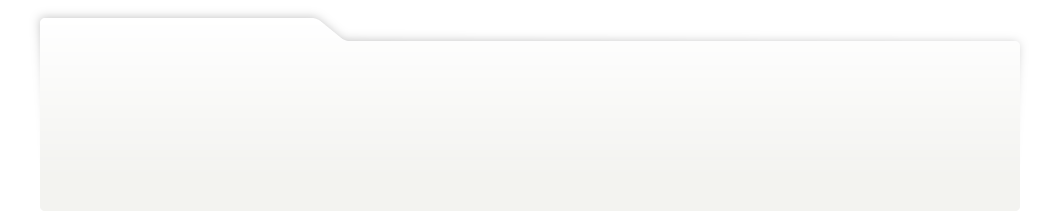
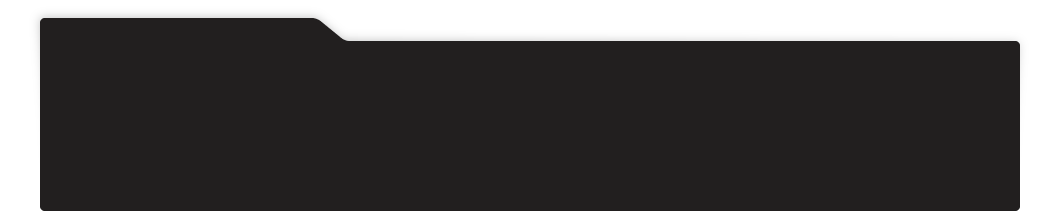
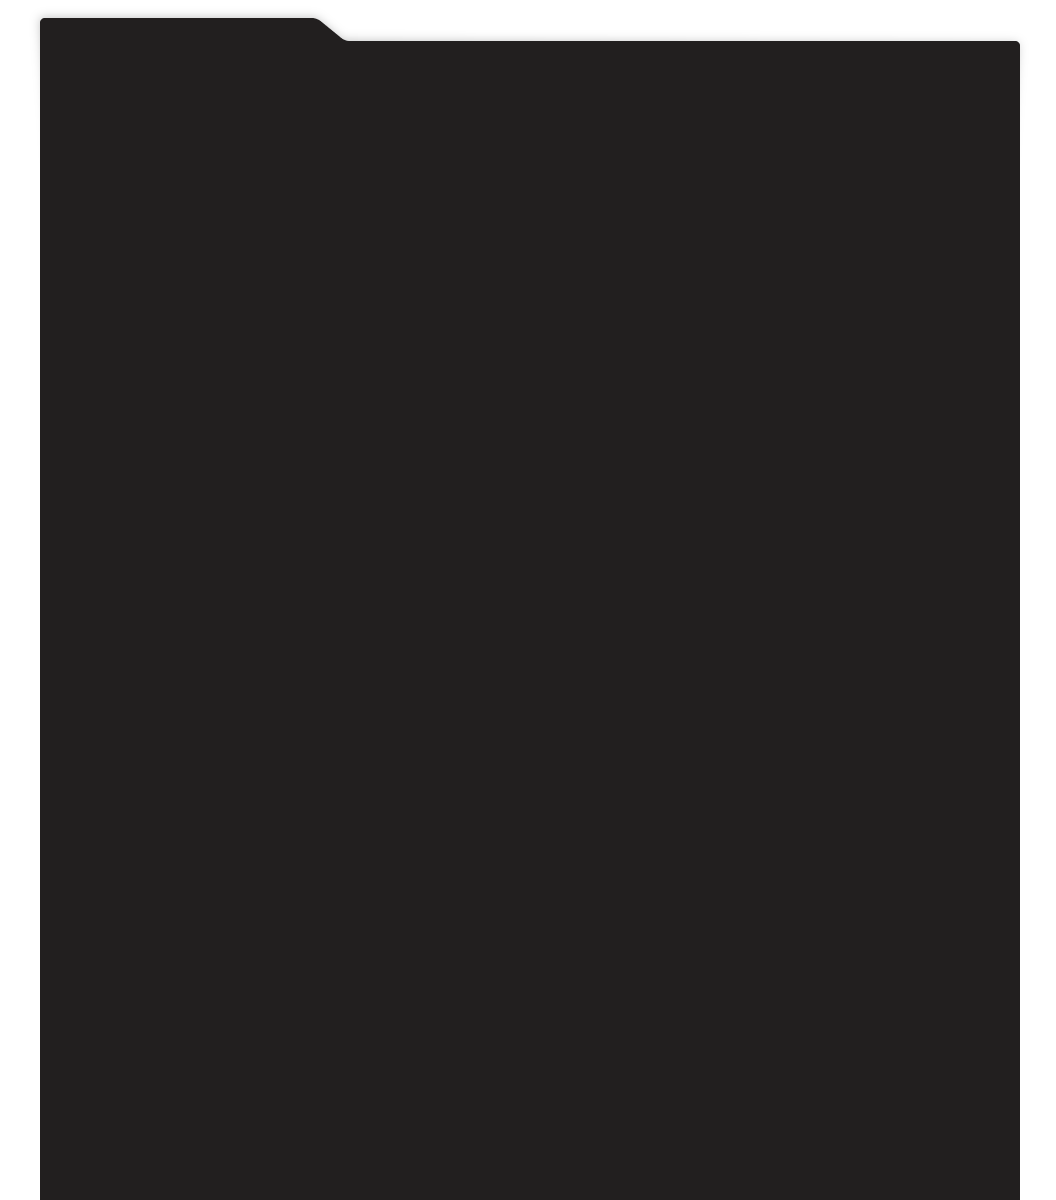
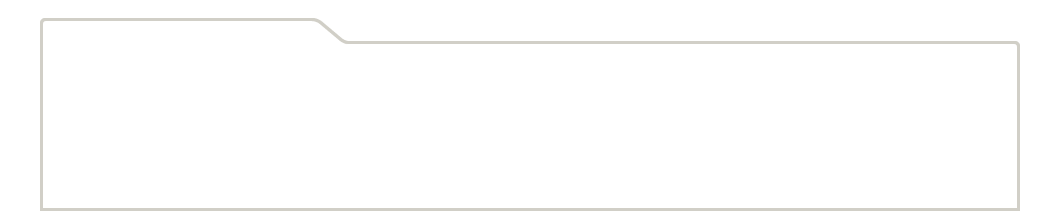
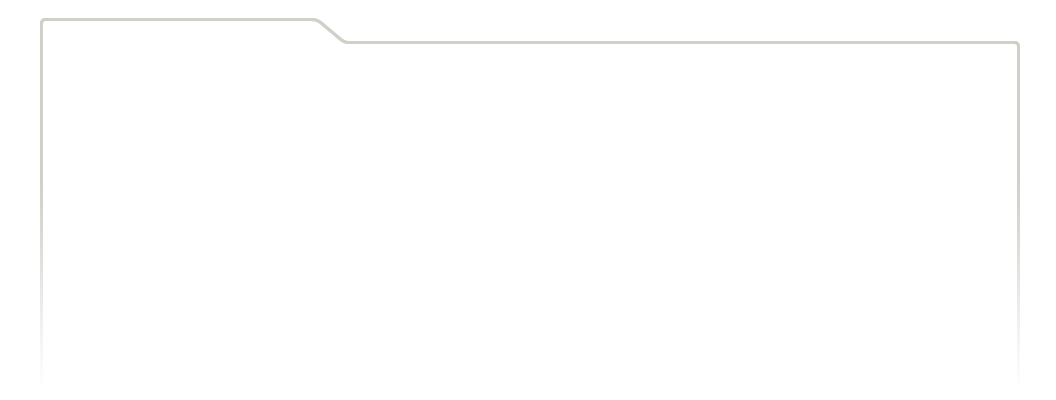
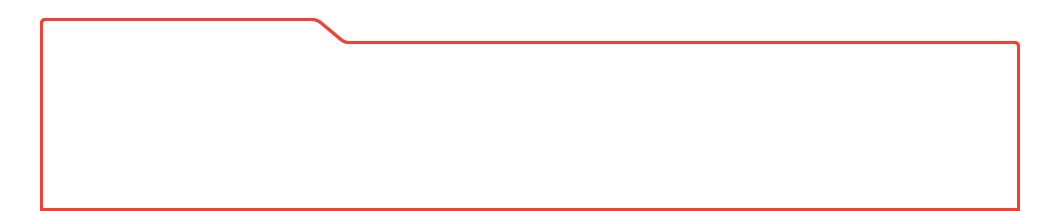
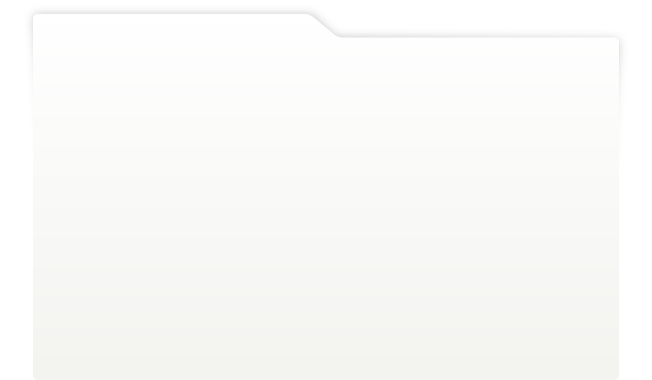
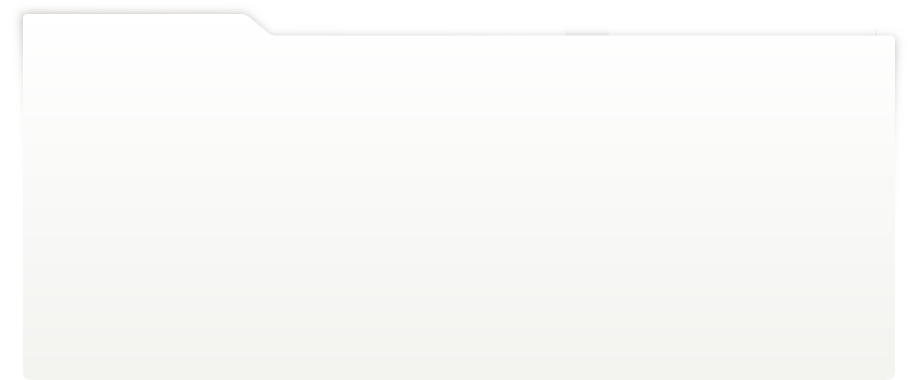
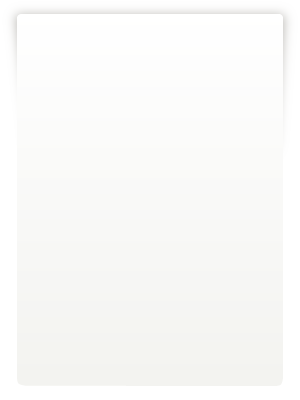
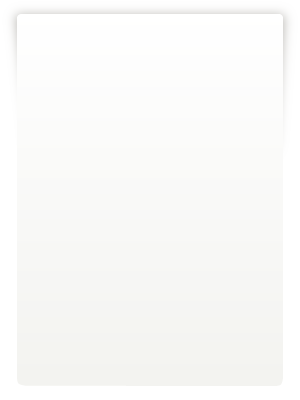
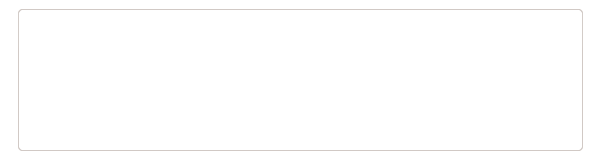
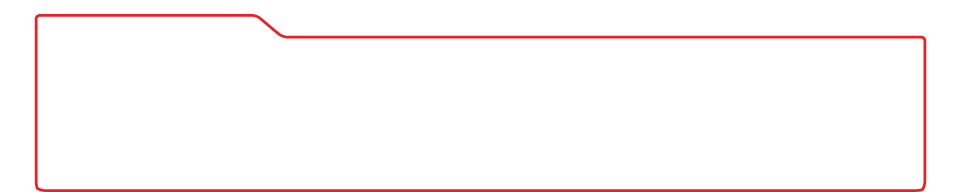
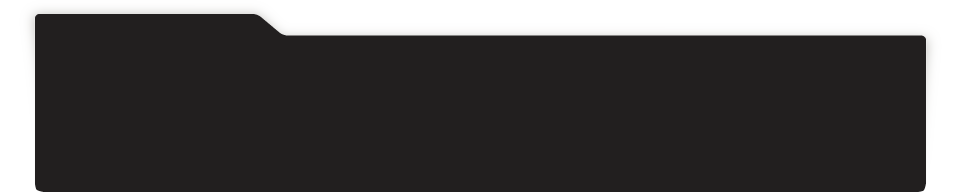
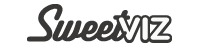
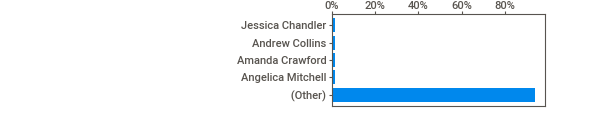
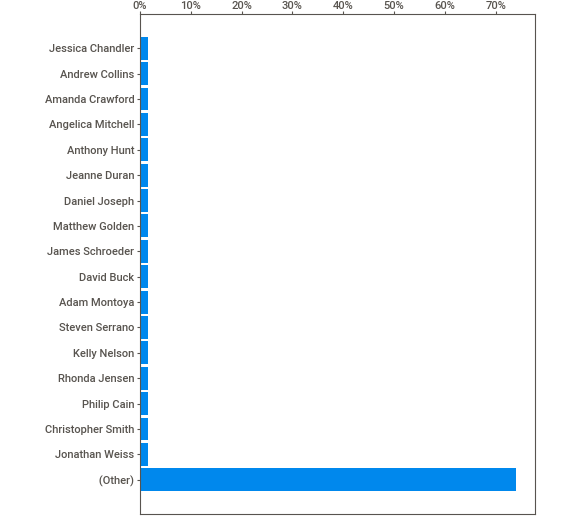
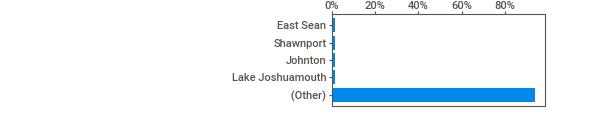
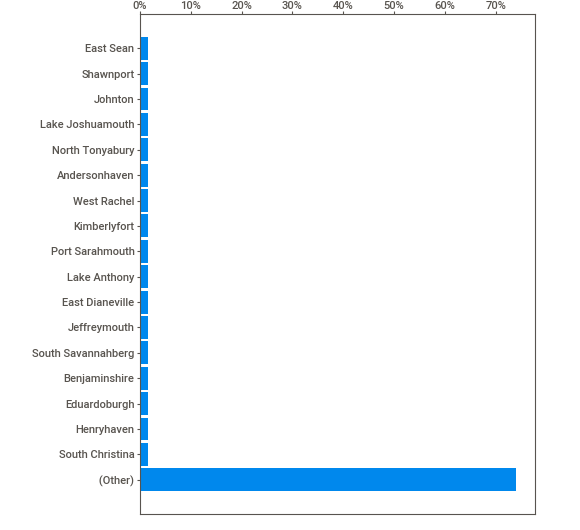
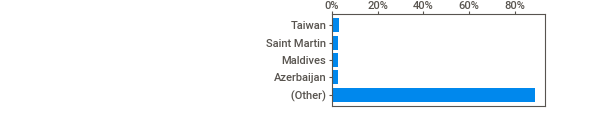
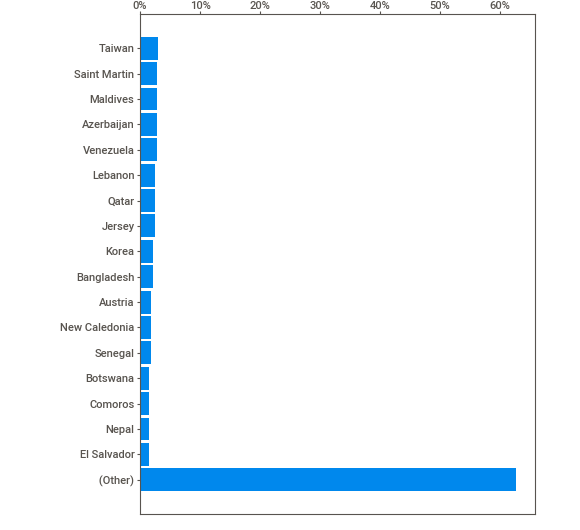
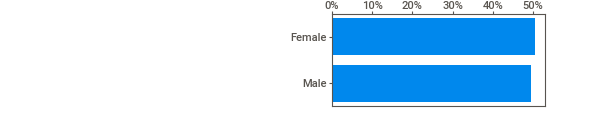
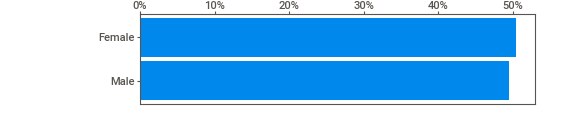
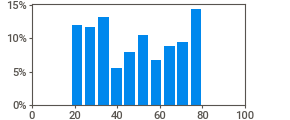
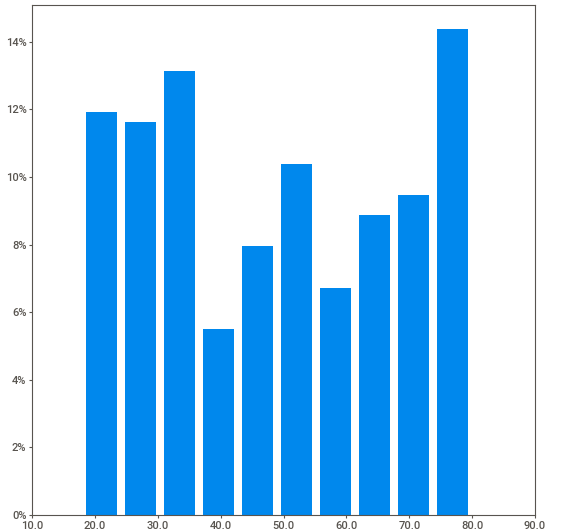
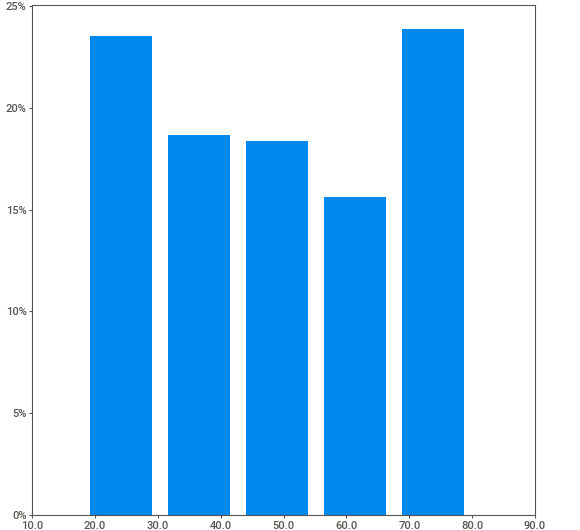
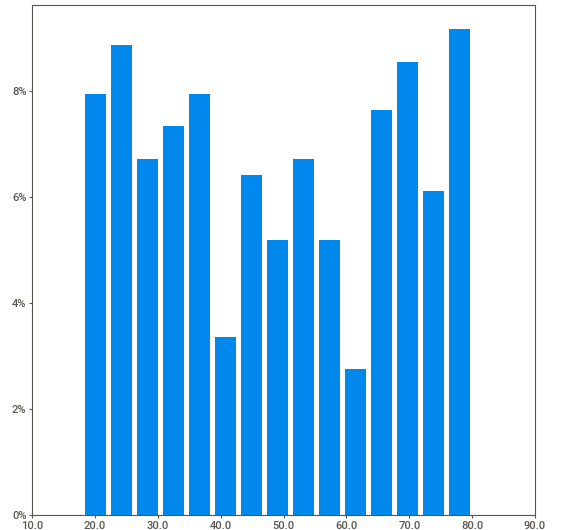
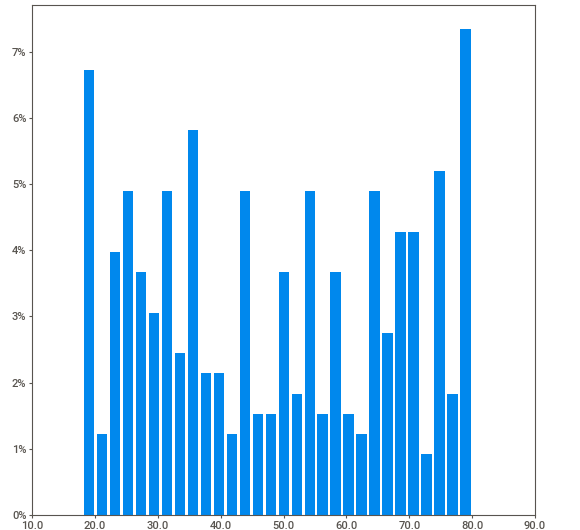
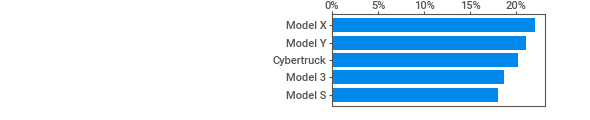
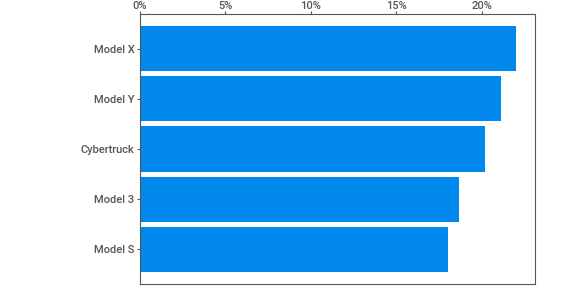
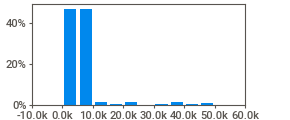
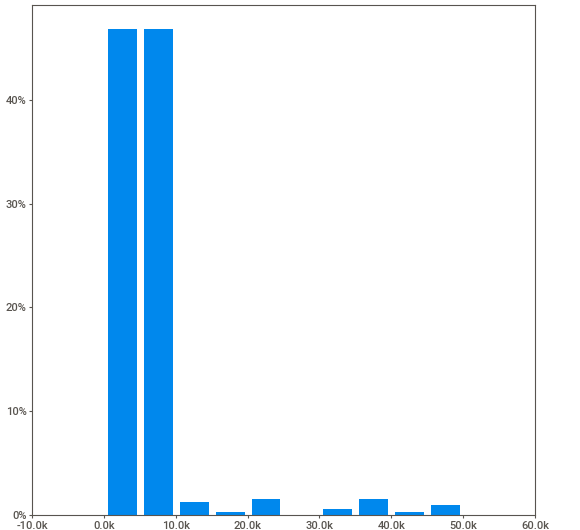
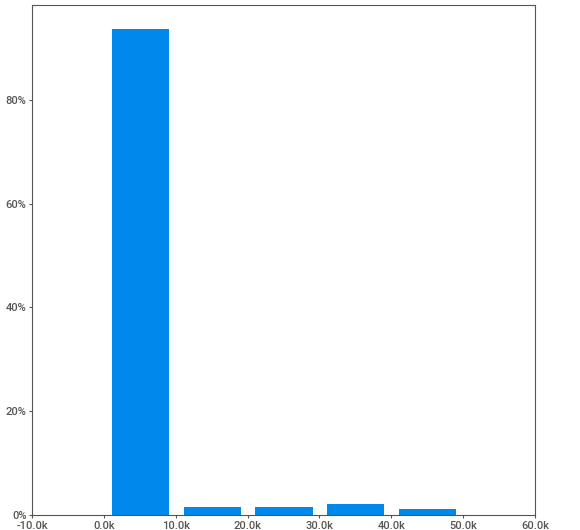
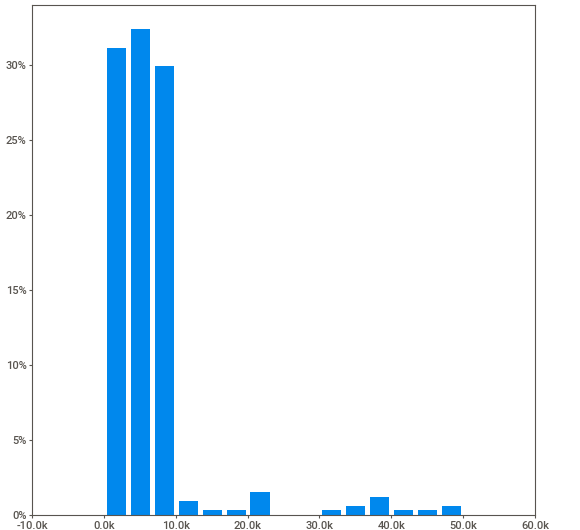
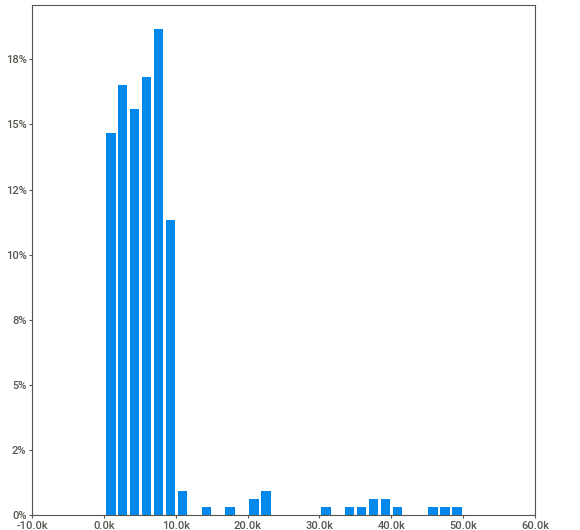
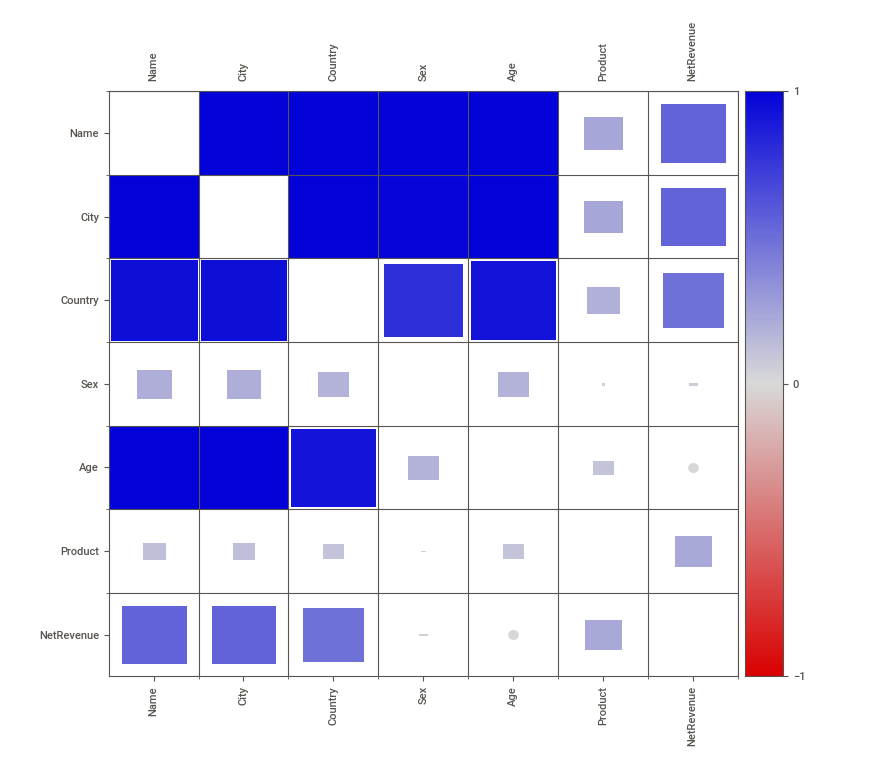
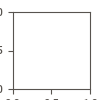

In [ ]:
!pip install sweetviz
import sweetviz as sw

report = sw.analyze(df2)
report.show_html('sweetviz_report.html')

report.show_notebook()

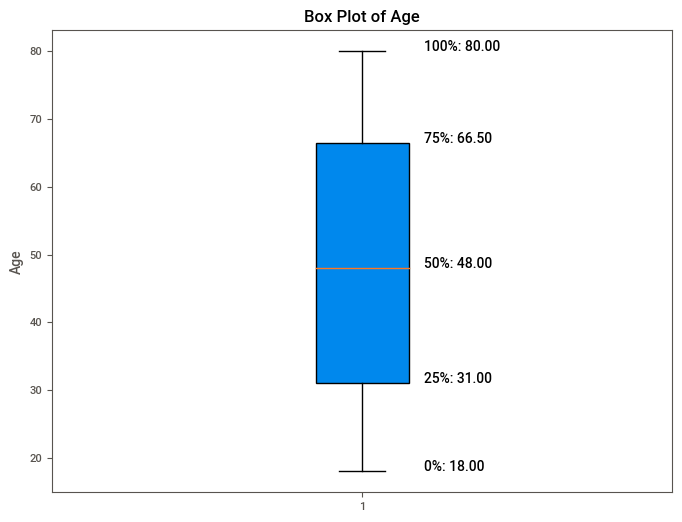

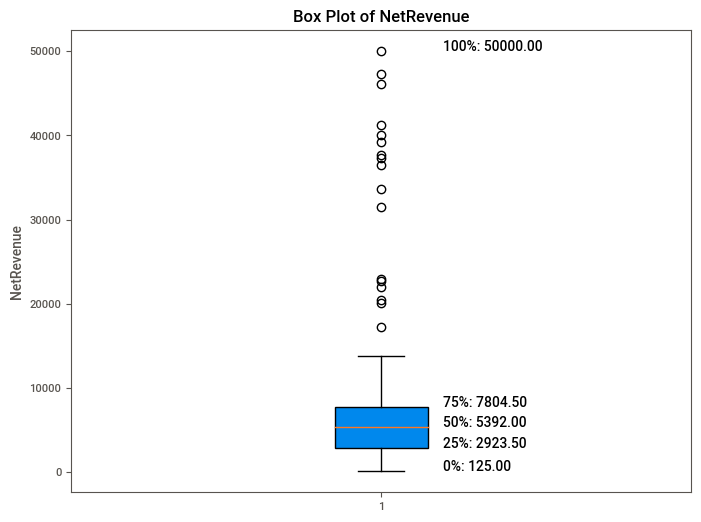

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for column in df2.select_dtypes(include=np.number).columns:
  # Calculate percentiles
  percentiles = [0, 25, 50, 75, 100]
  percentile_values = np.percentile(df2[column], percentiles)

  # Create box plot
  plt.figure(figsize=(8, 6))
  plt.boxplot(df2[column], vert=True, patch_artist=True)
  plt.title(f'Box Plot of {column}')
  plt.ylabel(column)

  # Add percentile labels
  for i, percentile in enumerate(percentiles):
    plt.text(1.1, percentile_values[i], f'{percentile}%: {percentile_values[i]:.2f}')

  plt.show() # Indentation corrected to be inside the for loop to display plots individually

In [ ]:
df = df2

# Calculate the IQR for Net Revenue
Q1 = df['NetRevenue'].quantile(0.25)
Q3 = df['NetRevenue'].quantile(0.75)
IQR = Q3 - Q1
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers based on the IQR method
outliers = df[(df['NetRevenue'] < lower_bound) | (df['NetRevenue'] > upper_bound)]
# Print the outliers
print("Outliers based on IQR for NetRevenue:")
print(outliers)

with pd.ExcelWriter('Final_work_Mikkonen.xlsx', mode ='a', engine='openpyxl') as writer:
    outliers.to_excel(writer, sheet_name='Outliers')

Outliers based on IQR for NetRevenue:
                       Name                 City           Country     Sex  \
45             Tammy Decker            Shawnport           Vanuatu  Female   
51            Robyn Andrews  North Sierrachester             Kenya    Male   
60          Jennifer Morris        Lake Johnstad       Switzerland  Female   
89           Michael Bailey             Bellfurt          Maldives  Female   
93           Chad Rodriguez           Mooreville           Armenia  Female   
104          Matthew Golden            East Sean       El Salvador  Female   
105          Matthew Golden            East Sean       El Salvador  Female   
164         Matthew Edwards            Smithland         Venezuela    Male   
184           Valerie Kelly          Harrismouth            Cyprus  Female   
200           Mary Williams      North Elizabeth        Azerbaijan  Female   
205         Michael Simpson          Levineville  Pitcairn Islands    Male   
222          Raymond Torre

In [ ]:
import numpy as np
from scipy import stats
# Calculate the z-scores for 'Net Revenue'
df['Net_Revenue_Zscore'] = np.abs(stats.zscore(df['NetRevenue']))
# Define a threshold for identifying outliers (e.g., z-score > 3)
threshold = 3
# Identify outliers based on the z-score method
outliers_zscore = df[df['Net_Revenue_Zscore'] > threshold]
# Print the outliers
print("Outliers based on Z-score for Net Revenue:")
print(outliers_zscore)

with pd.ExcelWriter('Final_work_Mikkonen.xlsx', mode ='a', engine='openpyxl') as writer:
    outliers_zscore.to_excel(writer, sheet_name='Outliers_Zscore')

Outliers based on Z-score for Net Revenue:
                       Name                 City           Country     Sex  \
45             Tammy Decker            Shawnport           Vanuatu  Female   
51            Robyn Andrews  North Sierrachester             Kenya    Male   
89           Michael Bailey             Bellfurt          Maldives  Female   
104          Matthew Golden            East Sean       El Salvador  Female   
164         Matthew Edwards            Smithland         Venezuela    Male   
184           Valerie Kelly          Harrismouth            Cyprus  Female   
205         Michael Simpson          Levineville  Pitcairn Islands    Male   
255             John Farmer     North Melissaton        Bangladesh    Male   
268  Mrs. Patricia Pitts MD              Johnton        Azerbaijan    Male   
278       Dr. Charles Jones         Lake Anthony           Somalia    Male   
302          Jesse Anderson          Jenkinsstad           Jamaica    Male   

     Age     Product

In [ ]:
!pip install ydata-profiling
import pandas as pd
from ydata_profiling import ProfileReport

# Assuming 'df' is your pandas DataFrame
profile = ProfileReport(df, title="Pandas Profiling Report")

# Generate the report
profile.to_file("Ydata.html")

# You can also display it in the notebook:
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

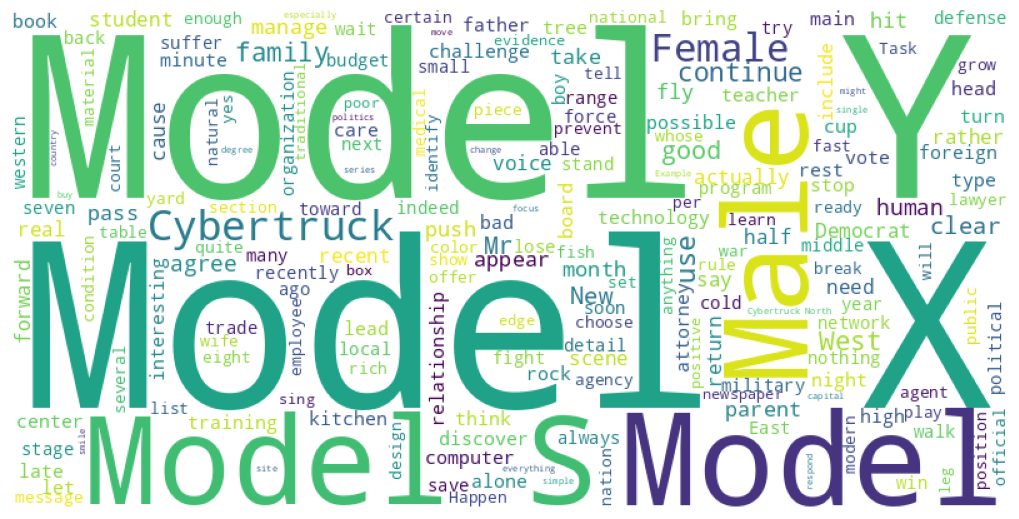

In [ ]:


from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl

from openpyxl.drawing.image import Image

df = pd.read_excel('/content/Final_work_Mikkonen.xlsx', sheet_name='Raw data')

# Assuming 'Feedback', 'Product', and 'City' are the columns you want to merge
columns_to_merge = ['Feedback', 'Product', 'City','Sex']

# Merge the columns into a new column called 'MergedText'
df['MergedText'] = df[columns_to_merge].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

# Generate the word cloud
feedback_text = ' '.join(df['MergedText'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(feedback_text)

#Save WordCloud
wordcloud.to_file('wordcloud.png')

# Load the Excel workbook
workbook = openpyxl.load_workbook('Final_work_Mikkonen.xlsx')

# Create a new sheet or select an existing one
worksheet = workbook.create_sheet(title='Word Cloud')

# Add the image to the worksheet
img = Image('wordcloud.png')
worksheet.add_image(img, 'A1')  # Position the image at cell A1

# Save the workbook
workbook.save('Final_work_Mikkonen.xlsx')


# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()



In [ ]:
import pandas as pd
from textblob import TextBlob


df = pd.read_excel('/content/Final_work_Mikkonen.xlsx', sheet_name='Raw data')

def analyze_feedback(feedback):
 analysis = TextBlob(feedback)
 return analysis.sentiment.polarity, analysis.sentiment.subjectivity

# Assuming 'Feedback' is the column name containing the feedback text
df['Polarity'], df['Subjectivity'] = zip(*df['Feedback'].apply(analyze_feedback))

def label_feedback(row):
 if row['Polarity'] > 0 and row['Subjectivity'] > 0.5:
    return 'Positive & Subjective'
 elif row['Polarity'] > 0 and row['Subjectivity'] <= 0.5:
    return 'Positive & Objective'
 elif row['Polarity'] == 0 and row['Subjectivity'] > 0.5:
   return 'Neutral & Subjective'
 elif row['Polarity'] == 0 and row['Subjectivity'] <= 0.5:
  return 'Neutral & Objective'
 elif row['Polarity'] < 0 and row['Subjectivity'] > 0.5:
  return 'Negative & Subjective'
 else:
  return 'Negative & Objective'

df['Feedback_Label'] = df.apply(label_feedback, axis=1)

with pd.ExcelWriter('Final_work_Mikkonen.xlsx', engine='openpyxl', mode='a') as writer:
    df.to_excel(writer, sheet_name='Sentiment Analysis', index=False)

print(df)

                Name            City                        Country     Sex  \
0    Patrick Johnson  Williamchester                        Senegal    Male   
1    Patrick Johnson  Williamchester                        Senegal    Male   
2     Monica Salinas     Robertsberg  Holy See (Vatican City State)    Male   
3     Monica Salinas     Robertsberg  Holy See (Vatican City State)    Male   
4      Steven Barnes      Murphystad           United Arab Emirates    Male   
..               ...             ...                            ...     ...   
322   David Caldwell        Colestad                         Jersey    Male   
323   David Caldwell        Colestad                         Jersey    Male   
324    Stephen Davis        Annabury                        Austria  Female   
325    Stephen Davis        Annabury                        Austria  Female   
326    Stephen Davis        Annabury                        Austria  Female   

     Age     Product                               

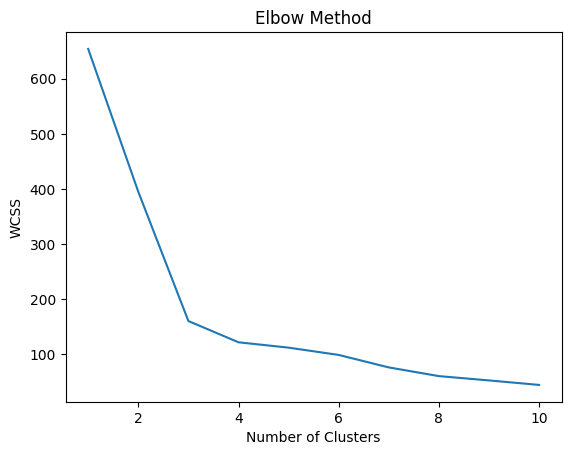

[[-0.09349174 -0.87234643]
 [-0.23194158  0.89602413]
 [ 4.63664682  0.14218509]]


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('/content/Final_work_Mikkonen.xlsx', sheet_name='Raw data')

# Select only numerical features for clustering
numerical_df = df[['NetRevenue', 'Age']]  # Select relevant numerical columns

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_df)

# Determine the optimal number of clusters using the Elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):  # Check for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the Elbow curve, choose the optimal number of clusters (e.g., 3)
optimal_n_clusters = 3  # Replace with your observation from the plot

# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Explore the clusters (e.g., print cluster centers)
print(kmeans.cluster_centers_)

# Further analysis and visualization can be performed based on the clusters

              Name            City                        Country   Sex  Age  \
0  Patrick Johnson  Williamchester                        Senegal  Male   52   
1  Patrick Johnson  Williamchester                        Senegal  Male   52   
2   Monica Salinas     Robertsberg  Holy See (Vatican City State)  Male   43   
3   Monica Salinas     Robertsberg  Holy See (Vatican City State)  Male   43   
4    Steven Barnes      Murphystad           United Arab Emirates  Male   19   

      Product                                           Feedback  NetRevenue  \
0     Model Y  Eight whether change detail whom happen. Natio...        9658   
1     Model X  Instead education natural each particularly. P...        3849   
2  Cybertruck  Try economic service while. Production station...        8533   
3     Model S  Dream pass large one avoid offer. Focus boy fr...         876   
4     Model 3  By buy month machine need of. Other rest every...        2358   

        Date  KMeans_Cluster  Agglomer

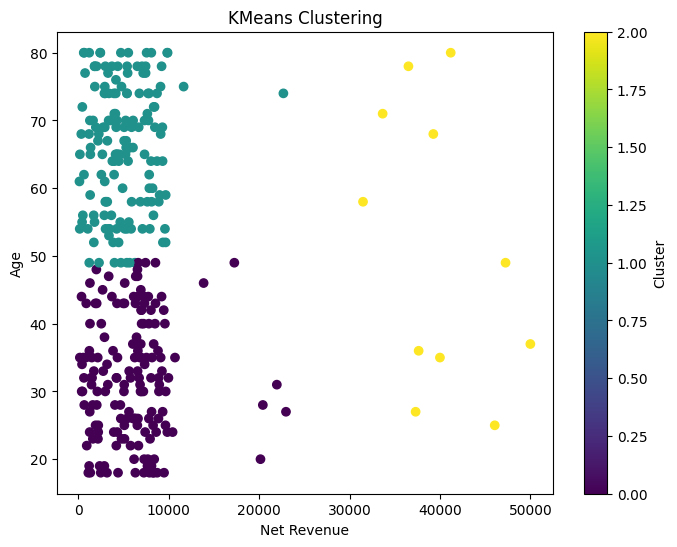

In [4]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

df = pd.read_excel('/content/Final_work_Mikkonen.xlsx', sheet_name='Raw data')
numerical_df = df[['NetRevenue', 'Age']]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_df)

# 1. KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose the number of clusters
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

# 2. Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=3)  # Choose the number of clusters
df['Agglomerative_Cluster'] = agglomerative.fit_predict(scaled_data)

# 3. DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)

# 4. Gaussian Mixture Model (GMM) Clustering
gmm = GaussianMixture(n_components=3, random_state=42)  # Choose the number of components
df['GMM_Cluster'] = gmm.fit_predict(scaled_data)

# Explore the clusters (e.g., print cluster labels, analyze cluster characteristics)
print(df.head())  # Print the first few rows with cluster assignments
# ... further analysis and visualization ...

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['NetRevenue'], df['Age'], c=df['KMeans_Cluster'], cmap='viridis')
plt.xlabel('Net Revenue')
plt.ylabel('Age')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
!pip install pycaret[full]  # Install PyCaret with all dependencies

import pandas as pd
from pycaret.classification import *  # Or import the relevant module (regression, clustering, etc.)

# Load your data (replace with your data loading code)
df = pd.read_excel('/content/Final_work_Mikkonen.xlsx', sheet_name='Raw data')

# Initialize PyCaret setup (replace 'target' with your target variable)
s = setup(data=df, target='Feedback_Label', session_id=123)

# Compare models and select the best one
best_model = compare_models()

# Create and tune the best model
tuned_model = tune_model(best_model)

# Evaluate the tuned model
evaluate_model(tuned_model)

# Make predictions on new data
predictions = predict_model(tuned_model, data=new_data)  # Replace 'new_data' with your new data

# Save the model
save_model(tuned_model, 'my_model')

# Load the saved model
loaded_model = load_model('my_model')
